In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
os.chdir("..")

In [3]:
!sbatch scripts/transfer/transfer_noise.sh

Submitted batch job 1550832


In [ ]:
!tail -f logs/simulation/a_cat_to_a_dog_1549660.out

In [2]:
from pathlib import Path
import torch
path = Path("/scratch/dldevel/sinziri/Evolutionary_Diffusion_Enhancement/results/a_dog_1549660/")
image_path = path / "images"

In [2]:
glob = image_path.glob("*.JPEG")
results =[] 
for p in glob:
    results.append(p.name)

print(len(results))

500


In [ ]:
data = [r.split("_") for r in results]

print(data[0])

data_x = [{"gen" : int(d[0].replace("g", "")),
          "id" : d[2],
          "score" : float(d[-1].replace("f", "").replace(".JPEG", ""))} for d in data]

print(data_x[0])


['g40', 'idn', '4087', 'f0.23817592859268188.JPEG']
{'gen': 40, 'id': '4087', 'score': 0.23817592859268188}
test


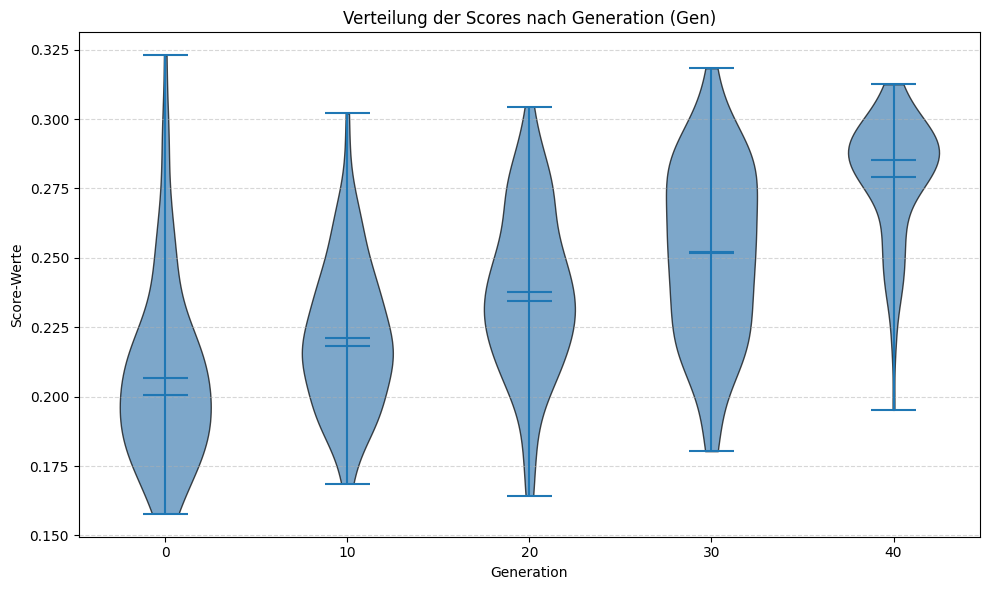

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(data_x)
df = df.sort_values(by='gen', ascending=True)
generations = df['gen'].unique()


grouped_data = [df['score'][df['gen'] == g].values for g in generations]
labels = generations

fig, ax = plt.subplots(figsize=(10, 6))

violins = ax.violinplot(
    grouped_data,
    
    positions=np.arange(1, len(labels) + 1), 
    vert=True,            
    showmeans=True,       
    showmedians=True,     
    showextrema=True      
)

for pc in violins['bodies']:
    pc.set_facecolor('#4682B4')  # Stahlblau
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)


ax.set_title('Verteilung der Scores nach Generation (Gen)')
ax.set_ylabel('Score-Werte')
ax.set_xlabel('Generation')


ax.set_xticks(np.arange(1, len(labels) + 1))
ax.set_xticklabels(labels)

plt.grid(True, linestyle='--', alpha=0.5, axis='y')
plt.tight_layout()
plt.show()

In [4]:
blip2_path = path / "blip2"

glob = blip2_path.glob("*.pt")
embds =[]
gen = []
for i in glob:
    print(f"\r{i}", flush=True, end='')
    embds.append(torch.load(i, map_location="cpu"))
    gen.append(int(str(i.name).split("_")[1].replace("g","")))
print(len(embds))
print(gen[0])

/scratch/dldevel/sinziri/Evolutionary_Diffusion_Enhancement/results/a_dog_1549660/blip2/blip2_g40_idn_4047_f0.27464354038238525.pt500
40


In [ ]:
print(embds[0].shape)
stacked_tensor = torch.cat(embds, dim=0)
data_matrix = stacked_tensor.numpy()
print(f"Shape of Blip2 Data: {data_matrix.shape}")

torch.Size([1, 1408])
Form der vorbereiteten Daten: (500, 1408)


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_matrix)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(scaled_data)

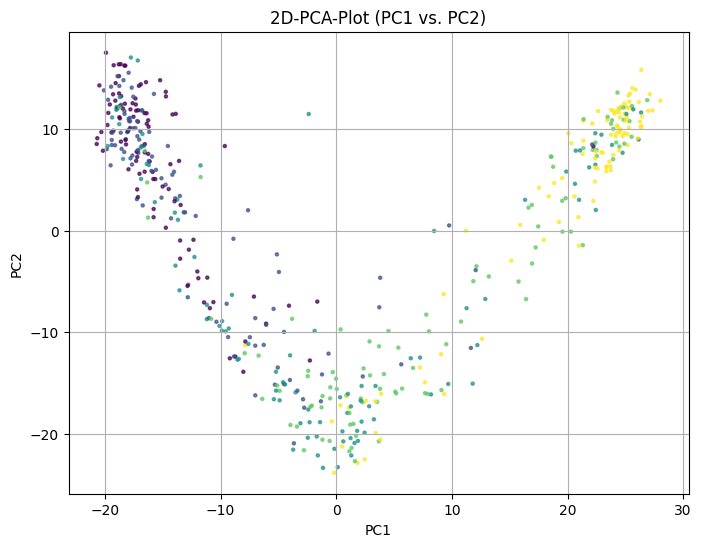

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
gen_nums = np.array([int(g) for g in gen])
min_gen = gen_nums.min() 
max_gen = gen_nums.max() 


plt.figure(figsize=(8, 6))



plt.scatter(
    principal_components[:, 0],
    principal_components[:, 1],
    c=gen_nums,
    cmap='viridis',
    s=5,
    alpha=0.7)
plt.title('2D-PCA-Plot (PC1 vs. PC2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

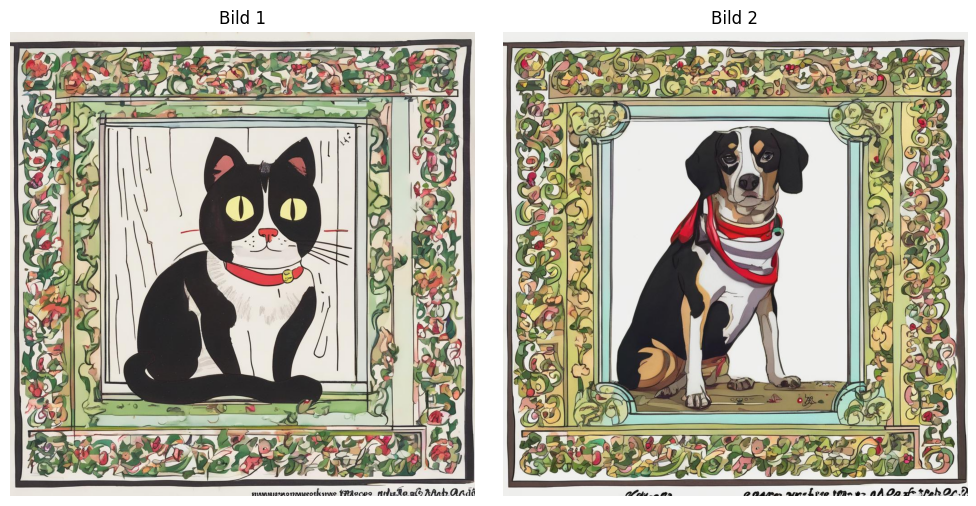

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
cat_path = Path("/scratch/dldevel/sinziri/Evolutionary_Diffusion_Enhancement/results/a_cat_1549660/images")
dog_path = Path("/scratch/dldevel/sinziri/Evolutionary_Diffusion_Enhancement/results/a_dog_1549660/images")
bild1 = mpimg.imread(cat_path / "g40_idn_4093_f0.18313145637512207.JPEG")
bild2 = mpimg.imread(dog_path / "g40_idn_4093_f0.23526757955551147.JPEG")

fig, achsen = plt.subplots(1, 2, figsize=(10, 5))

achsen[0].imshow(bild1)
achsen[0].set_title('Bild 1')
achsen[0].axis('off') 


achsen[1].imshow(bild2)
achsen[1].set_title('Bild 2')
achsen[1].axis('off') 


plt.tight_layout()
plt.show()